<a href="https://colab.research.google.com/github/ulissigroup/math-methods-chemical-engineering/blob/master/lecture_notes/11a-transient-CSTR-solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
$$\newcommand{\arr}[1]{\underline{\underline{#1}}}$$    
$$\newcommand{\vec}[1]{\underline{#1}}$$   
$$\require{mhchem}$$


# Reactor sizing problem. [25 pt]

You’re going to solve help me solve a reaction engineering problem without taking reaction engineering. Don’t tell your instructors next year, just tell them how obvious it when you do the first homework! (25 pt) 

Consider the reaction $\ce{A->B}$. The reaction is second order ($r=-k C_A^2$), $k=300$dm$^3$/mol/hr

* For a CSTR with constant inflow (constant concentration of A coming in) and outflow like we did in class, use a mass or mol balance on A to find the differential equation for A. The flow rate rate in is 10 dm$^3$/hr. The concentration in the inlet stream is 0.5 mol/dm$^3$.
* Solve for the particular solution assuming you know the volume V. 

The differential equation that we need to solve is:
\begin{align*}
\frac{dC_AV}{dt}=QC_{af}-QC_A-kVC_A^2&& C_A(t=0)=C_{A0}
\end{align*}

# Solution for a transient CSTR

First, we assume that the volume is constant. 
\begin{align*}
V\frac{dC_A}{dt}=QC_{af}-QC_A-kVC_A^2
\end{align*}
Rearranging
\begin{align*}
\frac{dC_A}{dt}=\frac{Q}{V}C_{af}-\frac{Q}{V}C_A-kC_A^2
\end{align*}
Let's define $\tau=V/Q$ to make our lives easier.
\begin{align*}
\frac{dC_A}{dt}=\frac{1}{\tau}C_{af}-\frac{1}{\tau}C_A-kC_A^2=\frac{-1}{\tau}(k\tau C_A^2+C_A-C_{af})
\end{align*}
This is already separable:
\begin{align*}
\frac{dC_A}{k\tau C_A^2+C_A-C_{af}}=\frac{-dt}{\tau}
\end{align*}
Integrating both sides
\begin{align*}
\int\frac{dC_A}{k\tau C_A^2+C_A-C_{af}}=\int\frac{-dt}{\tau}
\end{align*}
Now, the left hand side is possible with the integral formula
\begin{align*}
\int \frac{dx}{ax^2+bx+c}=\frac{2}{\sqrt{4ac-b^2}}\tan^{-1}\left(\frac{2ax+b}{\sqrt{4ac-b^2}}\right)
\end{align*}
This is the same as the previous integral, with $a=k, b=1, c=-C_{af}$. Let's define
\begin{align*}
\beta=\sqrt{4ac-b^2}=\sqrt{-4k\tau C_{af}-1}
\end{align*}
This is actually imaginary! Very interesting, but let's not worry about it for now. So, we have
\begin{align*}
\frac{2}{\sqrt{-4k\tau C_{af}-1}}\tan^{-1}\left(\frac{2k\tau C_A+1}{\sqrt{-4\tau kC_{af}-1}}\right)=\frac{-t}{\tau}+\alpha
\end{align*}
where $\alpha$ is the currently unknown constant of integration. Substitute $\beta$
\begin{align*}
\frac{2}{\beta}\tan^{-1}\left(\frac{2k\tau C_A+1}{\beta}\right)=\frac{-t}{\tau}+\alpha
\end{align*}
Solving for $C_A$
\begin{align*}
\frac{2k\tau C_A+1}{\beta}&=\tan\left(-\frac{\beta}{2}t+\alpha\right)\\
C_A&=\frac{1}{2k\tau }\left[\beta\tan\left(-\frac{\beta}{2}t+\alpha\right)-1\right]
\end{align*}
Pretty close! Now we just have to solve for $\alpha$ from the innitial condition $C_A(t=0)=C_{A0}$.
\begin{align*}
C_A(t=0)&=C_{A0}=\frac{1}{2k\tau }\left[\beta\tan\alpha-1\right]\\
\alpha&=\tan^{-1}\left(\frac{2k\tau C_{A0}+1}{\beta}\right)
\end{align*}
Plugging this back in:
\begin{align*}
C_A&=\frac{1}{2k\tau }\left[\beta\tan\left(-\frac{\beta}{2}t+\tan^{-1}\left(\frac{2k\tau C_{A0}+1}{\beta}\right)\right)-1\right]
\end{align*}

At this point, it's completely unclear to me what this looks like, so let's just go ahead and plot this thing with some reference values.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'C_A')

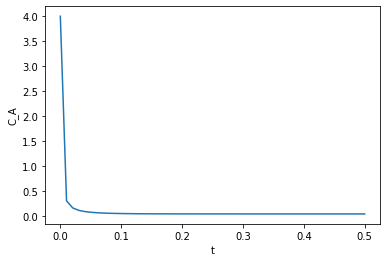

In [0]:
import numpy as np

V = 10 #dm^3
Q = 10 #dm^3/hr
k = 300 #dm^3/mol/hr
Caf = 0.5 #mol/dm^3
Ca0 = 4 #mol/dm^3

t = np.linspace(0,0.5)

beta=(-4*k*Caf-1)**0.5

Ca = 1/2/k*(beta*np.tan(-beta/2*t+
                        np.arctan((2*k*Ca0+1)/beta))-1)

import matplotlib.pyplot as plt

plt.plot(t,Ca)
plt.xlabel('t')
plt.ylabel('C_A')

Let's check $C_A$ to see what it looks like since we're getting this warning.

In [0]:
Ca

array([1.        +1.43979487e-15j, 0.61990999+5.38445124e-16j,
       0.44933556+2.74708364e-16j, 0.35256583+1.63856910e-16j,
       0.29028362+1.07357130e-16j, 0.24688703+7.48624611e-17j,
       0.21495173+5.45551515e-17j, 0.19049393+4.10696872e-17j,
       0.17118427+3.16893337e-17j, 0.15556976+2.49212714e-17j,
       0.14269706+1.98911982e-17j, 0.1319147 +1.60601726e-17j,
       0.12276235+1.30817222e-17j, 0.11490551+1.07251439e-17j,
       0.10809525+8.83217081e-18j, 0.10214251+7.29140892e-18j,
       0.09690107+6.02268842e-18j, 0.09225614+4.96717249e-18j,
       0.08811625+4.08092768e-18j, 0.0844077 +3.33063977e-18j,
       0.08107038+2.69069586e-18j, 0.0780548 +2.14115734e-18j,
       0.07531984+1.66632679e-18j, 0.07283105+1.25371820e-18j,
       0.07055934+8.93306329e-19j, 0.06848   +5.76971982e-19j,
       0.06657187+2.98087251e-19j, 0.06481675+5.12017325e-20j,
       0.0631989 -1.68197263e-19j, 0.06170462-3.63869746e-19j,
       0.06032194-5.38967122e-19j, 0.05904035-6.9614529

Notice that the imaginary part is basically zero in every case. 

We can actually simplify this down even further! If we use the definition of the arctan of an imaginary number, and the definition of tan of imaginary numbers, we eventually get to
\begin{align*}
C_A=\frac{-Q}{2Vk}+\frac{\sqrt{Q^2+4C_{af}kVQ}}{2Vk}\tanh\left(\frac{\sqrt{Q^2+4C_{af}kVQ}}{2V}t+2\tanh^{-1}\left[\frac{Q+2C_{A0}kV}{\sqrt{Q^2+4C_{af}kVQ}}\right]\right)
\end{align*}

The two definitions you need to make this happen are:
\begin{align*}
i\tanh z=\tan iz && \tan^{-1}(ix)=i\tanh^{-1}(x)
\end{align*}


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


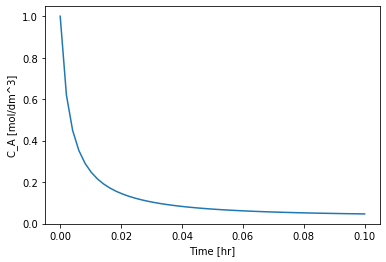

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


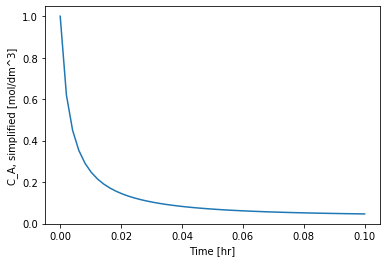

In [0]:
# Original equation
Ca = 1/2/k*(beta*np.tan(-beta/2*t+
                        np.arctan((2*k*Ca0+1)/beta))-1)

# Simplified equation
alpha = (Q**2+4*Caf*k*V*Q)**0.5
Ca_simplified = -Q/2/V/k + alpha/2/V/k*np.tanh(alpha/2/V*t+np.arctanh((Q+2*Ca0*k*V)/alpha+0j)  )
import matplotlib.pyplot as plt

plt.plot(t,Ca)
plt.xlabel('Time [hr]')
plt.ylabel('C_A [mol/dm^3]')
plt.show()
plt.plot(t,Ca_simplified)
plt.xlabel('Time [hr]')
plt.ylabel('C_A, simplified [mol/dm^3]')
plt.show()

In [0]:
Ca_simplified

array([0.00166113-4.97057185e-18j, 0.00267418-4.94728687e-18j,
       0.00368187-4.91802208e-18j, 0.00468297-4.88292074e-18j,
       0.00567633-4.84215300e-18j, 0.0066608 -4.79591414e-18j,
       0.00763528-4.74442264e-18j, 0.00859872-4.68791805e-18j,
       0.00955014-4.62665865e-18j, 0.01048857-4.56091905e-18j,
       0.01141315-4.49098771e-18j, 0.01232304-4.41716436e-18j,
       0.01321748-4.33975747e-18j, 0.01409576-4.25908171e-18j,
       0.01495726-4.17545548e-18j, 0.01580141-4.08919855e-18j,
       0.01662769-4.00062975e-18j, 0.01743567-3.91006486e-18j,
       0.01822498-3.81781463e-18j, 0.01899529-3.72418294e-18j,
       0.01974637-3.62946520e-18j, 0.02047801-3.53394685e-18j,
       0.02119007-3.43790216e-18j, 0.02188249-3.34159308e-18j,
       0.02255523-3.24526842e-18j, 0.02320832-3.14916313e-18j,
       0.02384181-3.05349774e-18j, 0.02445583-2.95847802e-18j,
       0.02505051-2.86429478e-18j, 0.02562606-2.77112379e-18j,
       0.0261827 -2.67912582e-18j, 0.02672067-2.5884468

Notice the two solutions are exactly the same! 